# What makes pokemon legendary

## List of tasks
1. Introduction
2. Number of Legendary Pokemons
3. Analysing Legendary Pokemons by height, type, weight and fightning stats
4. Creating datasets for training and testing
5. Choosing model
6. Fit model
7. Analyzing variable importance
8. Conclusion

## 1. Introduction
First we need to prepare our environment so let's start with importing libraries and our dataset

In [1]:
import pandas as pd
pokemon_dataset = pd.read_csv('pokemon.csv')

In [2]:
pokemon_dataset.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [3]:
pokemon_dataset.keys()

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [5]:
pokemon_dataset['name'].head()

0     Bulbasaur
1       Ivysaur
2      Venusaur
3    Charmander
4    Charmeleon
Name: name, dtype: object

In [18]:
pokemon_dataset['type1'].head()

0    grass
1    grass
2    grass
3     fire
4     fire
Name: type1, dtype: object

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
pokemon_dataset_val_count = pokemon_dataset['type1'].value_counts()
pokemon_dataset_val_count

water       114
normal      105
grass        78
bug          72
psychic      53
fire         52
rock         45
electric     39
ground       32
poison       32
dark         29
fighting     28
dragon       27
ghost        27
steel        24
ice          23
fairy        18
flying        3
Name: type1, dtype: int64

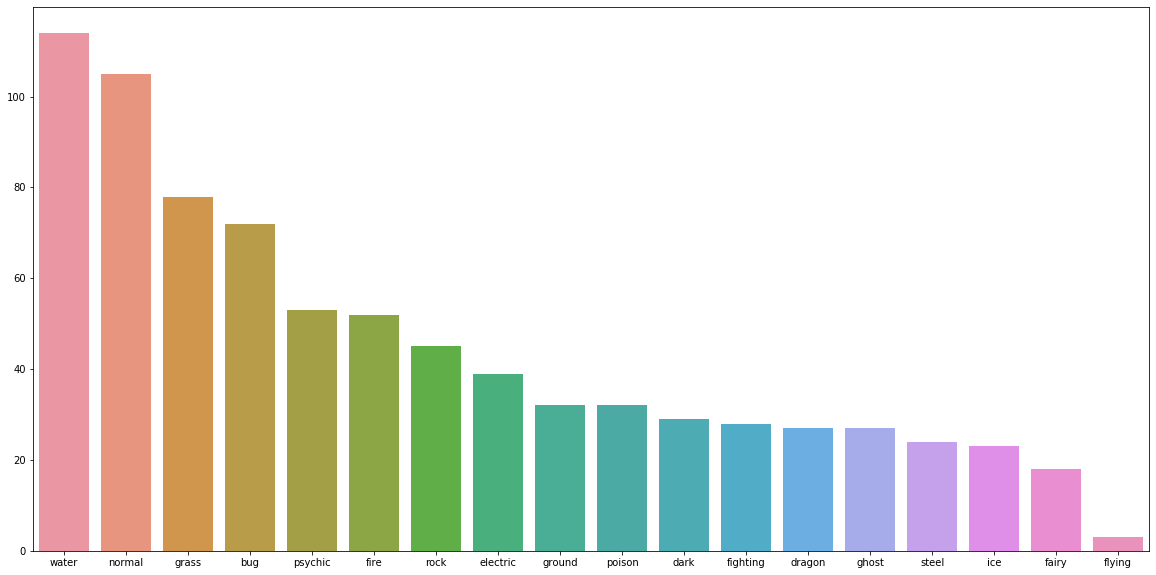

In [47]:
plt.figure(figsize=(20,10))
sns.barplot(x = pokemon_dataset_val_count.index, y = pokemon_dataset_val_count.values)